# Neural Nets to Predict Normal Abnormal HR from Modes

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [3]:
from fastai.tabular import *

In [4]:
PATH = "/home/tris/Github/SysID_EEGdynamics/src/data/preprocessed/tabular_DMD"

In [5]:
# col_names=['subject','trial','mode_no','real1','real2','real3','real4','real5','real6','real7','real8','real9','real10','real11','real12','real13','real14','real15','real16','real17','real18','real19','real20','real21','real22','real23','real24','real25','real26','real27','real28','real29','real30','real31','real32','imag1','imag2','imag3','imag4','imag5','imag6','imag7','imag8','imag9','imag10','imag11','imag12','imag13','imag14','imag15','imag16','imag17','imag18','imag19','imag20','imag21','imag22','imag23','imag24','imag25','imag26','imag27','imag28','imag29','imag30','imag31','imag32','fn','zeta'];

In [60]:
df_raw = pd.read_csv('/home/tris/Github/SysID_EEGdynamics/src/data/preprocessed/2021_06_09_hr_ex_06.csv')
df_raw

,ecg_id,patient_id,sex,norm,Phi1,Phi2,Phi3,Phi4,Phi5,Phi6,...,Phi303,Phi304,Phi305,Phi306,Phi307,Phi308,Phi309,Phi310,Phi311,Phi312
0,1,15709,1,1,0.015572,0.023814,0.008251,-0.019763,0.003584,0.015935,...,2.146139,3.226554,4.556731,4.767723,6.303571,7.469374,9.243407,10.268710,0.000000,0.0
1,2,13243,0,1,-0.041702,-0.045905,-0.004205,0.043828,-0.018688,-0.025016,...,0.795962,1.472889,2.326472,3.031758,5.069717,5.081026,6.685025,8.835965,16.186942,0.0
2,3,20372,1,1,-0.013814,0.083291,0.097091,-0.034933,-0.055571,0.090031,...,1.054056,2.012821,3.166445,4.256115,6.256344,7.404664,8.232984,8.690769,9.703875,0.0
3,4,17014,0,1,-0.002502,0.220891,0.223397,-0.109313,-0.113052,0.222037,...,2.495217,3.740192,4.958690,7.872986,8.817643,11.530264,12.935482,15.668860,0.000000,0.0
4,5,17448,1,1,-0.018220,-0.106136,-0.087908,0.062304,0.034953,-0.096874,...,1.096657,2.222577,3.306793,4.325244,5.102166,6.672870,7.674670,14.393960,15.427402,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,995,6672,1,1,-0.067424,-0.077997,-0.010557,0.072756,-0.028276,-0.044131,...,1.978077,3.950819,6.042150,9.901632,11.837825,13.861034,15.876797,17.980304,0.000000,0.0
990,996,1010,1,0,0.048104,0.038374,-0.009743,-0.043171,0.028838,0.014244,...,0.277924,1.310896,2.967807,4.459766,5.016105,5.960350,7.429560,8.877952,10.345508,0.0
991,997,381,1,0,0.019675,0.042105,0.022416,-0.030938,-0.001526,0.032170,...,0.948361,1.901178,2.942420,3.740120,4.978381,6.955064,8.145454,10.030327,11.512093,0.0
992,998,6058,0,0,-0.003076,-0.015586,-0.012538,0.009388,0.004733,-0.014040,...,0.316456,0.320742,0.371482,1.095560,2.295370,3.271089,5.729419,6.864312,9.178066,0.0


In [61]:
df_raw.iloc[[40],:]

,ecg_id,patient_id,sex,norm,Phi1,Phi2,Phi3,Phi4,Phi5,Phi6,...,Phi303,Phi304,Phi305,Phi306,Phi307,Phi308,Phi309,Phi310,Phi311,Phi312
40,41,8420,0,0,0.018435,-0.027614,-0.046041,0.004643,0.032265,-0.036798,...,3.626499,6.048492,7.258347,8.465331,9.67356,10.880367,12.07351,13.24216,0.0,0.0


In [62]:
# os.makedirs('tmp', exist_ok=True)
# df_raw.to_feather('tmp/eeg-raw')

In [63]:
import pandas as pd
#df_raw = pd.read_feather('tmp/eeg-raw') #lol raw sashimis and sushis
df_raw.head()

,ecg_id,patient_id,sex,norm,Phi1,Phi2,Phi3,Phi4,Phi5,Phi6,...,Phi303,Phi304,Phi305,Phi306,Phi307,Phi308,Phi309,Phi310,Phi311,Phi312
0,1,15709,1,1,0.015572,0.023814,0.008251,-0.019763,0.003584,0.015935,...,2.146139,3.226554,4.556731,4.767723,6.303571,7.469374,9.243407,10.268710,0.000000,0.0
1,2,13243,0,1,-0.041702,-0.045905,-0.004205,0.043828,-0.018688,-0.025016,...,0.795962,1.472889,2.326472,3.031758,5.069717,5.081026,6.685025,8.835965,16.186942,0.0
2,3,20372,1,1,-0.013814,0.083291,0.097091,-0.034933,-0.055571,0.090031,...,1.054056,2.012821,3.166445,4.256115,6.256344,7.404664,8.232984,8.690769,9.703875,0.0
3,4,17014,0,1,-0.002502,0.220891,0.223397,-0.109313,-0.113052,0.222037,...,2.495217,3.740192,4.958690,7.872986,8.817643,11.530264,12.935482,15.668860,0.000000,0.0
4,5,17448,1,1,-0.018220,-0.106136,-0.087908,0.062304,0.034953,-0.096874,...,1.096657,2.222577,3.306793,4.325244,5.102166,6.672870,7.674670,14.393960,15.427402,0.0


In [64]:
# df_raw.iloc[[200],:]

In [65]:
# fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# axs[0].hist(df_raw.norm)
# axs[0].set_title('Label')
# axs[1].hist(df_raw.sex)
# axs[1].set_title('Sex')
# axs[2].hist(df_raw.Phi1)
# axs[2].set_title('Mode1c1')


In [69]:
valid_idx=np.random.randint(low=0, high=len(df_raw), size=250)

In [70]:
valid_idx

array([706,  17, 369, 352, ..., 810, 857, 330, 397])

In [71]:
dep_var= 'norm'

In [72]:
path = "/media/tris/tris_files/github/SysID_EEGdynamics/models"

In [73]:
data = TabularDataBunch.from_df(path, df_raw, dep_var, valid_idx=valid_idx)

In [74]:
data.show_batch()

Phi186,Phi296,Phi127,Phi206,Phi6,Phi109,Phi60,Phi112,Phi104,Phi26,Phi153,Phi147,Phi49,Phi64,Phi85,Phi158,Phi13,Phi99,Phi215,Phi285,Phi256,Phi45,Phi154,Phi220,Phi219,Phi233,Phi196,Phi48,Phi148,Phi253,Phi10,Phi302,Phi119,Phi244,Phi237,Phi33,Phi61,Phi235,Phi55,Phi20,Phi175,Phi157,Phi7,Phi188,Phi198,Phi140,Phi190,Phi24,Phi63,Phi212,Phi214,Phi311,Phi110,sex,Phi4,Phi128,Phi44,Phi46,Phi115,Phi165,Phi123,Phi92,Phi286,Phi183,Phi306,Phi271,Phi168,Phi227,Phi275,Phi263,Phi79,Phi144,Phi51,Phi284,Phi265,Phi171,Phi94,Phi164,Phi62,Phi1,Phi281,Phi267,Phi257,Phi5,Phi81,Phi273,Phi195,Phi221,Phi31,Phi22,Phi197,Phi250,Phi130,Phi143,Phi65,Phi71,Phi230,Phi295,Phi11,Phi229,Phi162,Phi133,Phi247,Phi213,Phi96,Phi280,Phi134,Phi23,Phi223,Phi312,Phi200,Phi73,Phi269,Phi232,Phi122,Phi54,Phi149,Phi58,Phi136,Phi193,Phi146,Phi50,Phi21,Phi15,Phi125,Phi111,Phi282,Phi3,Phi35,Phi30,Phi57,Phi17,Phi224,Phi139,Phi91,Phi100,Phi161,Phi231,Phi156,Phi145,ecg_id,Phi290,Phi249,Phi291,Phi293,Phi205,Phi9,Phi78,Phi129,Phi89,Phi150,Phi210,Phi178,Phi242,Phi137,Phi191,Phi74,Phi38,Phi194,Phi199,Phi288,Phi170,Phi254,Phi304,Phi106,Phi43,Phi67,Phi102,Phi117,Phi177,Phi202,Phi298,Phi131,Phi308,Phi211,Phi184,Phi228,Phi87,Phi95,Phi292,Phi181,Phi160,Phi277,Phi289,Phi203,Phi132,Phi305,Phi258,Phi255,Phi19,Phi310,Phi16,Phi124,Phi294,Phi225,Phi151,Phi176,Phi118,Phi246,Phi40,Phi101,Phi90,Phi69,Phi103,Phi32,Phi208,Phi152,Phi68,Phi121,Phi135,Phi141,Phi260,Phi113,Phi27,Phi226,Phi201,Phi72,Phi52,Phi120,Phi299,Phi279,Phi180,Phi93,Phi204,Phi107,Phi83,Phi169,Phi77,Phi88,Phi264,Phi239,Phi218,Phi12,Phi216,Phi309,Phi37,Phi283,Phi59,Phi155,Phi300,Phi42,Phi142,Phi179,Phi126,Phi98,Phi252,Phi41,Phi301,Phi261,Phi217,Phi207,Phi259,Phi209,Phi138,Phi307,Phi56,Phi70,Phi238,Phi248,Phi159,Phi182,Phi75,Phi66,Phi303,Phi36,Phi2,Phi47,Phi29,Phi14,Phi189,Phi18,Phi243,Phi76,Phi266,Phi167,Phi185,Phi222,Phi105,Phi82,Phi172,Phi272,Phi116,Phi274,Phi187,Phi173,Phi234,Phi268,Phi80,Phi240,Phi34,Phi287,Phi25,Phi297,Phi278,Phi174,Phi114,Phi236,Phi192,Phi270,Phi251,Phi241,Phi108,Phi86,Phi84,Phi53,Phi28,Phi39,patient_id,Phi166,Phi8,Phi276,Phi245,Phi163,Phi262,Phi97,target
-0.0147,-0.0038,-0.0071,0.0117,0.0369,0.0026,-0.0317,-0.0045,-0.0022,0.0389,0.0000,0.0000,-0.0103,-0.0068,0.0086,0.0066,-0.0083,0.0022,0.0209,0.0000,-0.0008,-0.0406,0.0000,-0.0119,0.0157,0.0030,0.0000,-0.0202,0.0000,0.0024,0.0541,0.2336,0.0109,-0.0058,0.0204,0.0734,0.0031,0.0103,-0.0108,0.1181,-0.0163,0.0113,0.0085,-0.0114,0.0000,0.0000,-0.0238,0.0221,0.0074,0.0321,0.0272,11.6068,0.0065,0.0000,-0.0017,-0.0106,-0.0445,-0.0344,0.0021,-0.0331,0.0024,0.0151,0.0000,-0.0145,3.1171,0.0011,0.0409,0.0259,0.0127,0.0034,0.0011,0.0000,-0.0152,0.0000,0.0036,0.0057,0.0261,-0.0581,0.0104,-0.0226,0.0000,0.0049,0.0028,-0.0355,-0.0266,0.0159,0.0000,-0.0058,0.0056,0.0172,0.0000,0.0124,-0.0064,0.0000,-0.0022,0.0206,0.0032,-0.0048,-0.0072,0.0046,0.0010,0.0000,-0.0050,0.0321,0.0181,0.0000,0.0000,0.0062,-0.0105,0.0000,0.0000,-0.0018,-0.0007,-0.0039,0.0007,-0.0203,0.0000,-0.0525,0.0000,0.0000,0.0000,-0.0255,0.0442,0.0087,-0.0020,0.0039,0.0000,0.0483,0.0596,0.0308,-0.0577,-0.0085,0.0139,0.0000,-0.0038,0.0000,0.0080,-0.0014,0.0000,0.0000,342.0000,0.4280,0.0112,0.0988,1.0000,0.0135,0.0803,-0.0098,-0.0092,0.0013,0.0000,0.0050,0.0117,0.0079,0.0000,-0.0163,-0.0107,-0.0183,0.0000,0.0000,0.0000,0.0084,-0.0007,1.9047,-0.0013,-0.0150,-0.0095,0.0016,0.0142,0.0013,0.0000,0.0038,-0.0038,7.4028,0.0110,0.0079,0.0175,0.0059,0.0217,0.1114,-0.0006,-0.0090,0.0000,1.0000,0.0000,-0.0049,2.7412,-0.0019,-0.0031,0.0129,10.5762,0.0040,0.0005,-0.0057,0.0261,0.0000,-0.0160,0.0144,0.0060,0.0163,-0.0016,0.0101,0.0224,-0.0024,0.0627,-0.0126,0.0000,0.0124,-0.0017,0.0000,0.0000,0.0105,-0.0006,0.0229,0.0284,0.0000,0.0149,0.0180,0.0084,0.0024,0.0000,0.0148,0.0248,0.0000,-0.0003,-0.0212,0.0026,0.0035,-0.0115,0.0046,0.0098,0.0198,0.0221,0.0184,8.4699,-0.0144,0.0000,-0.0397,0.0000,0.0000,-0.0111,0.0000,0.0111,0.0016,0.0011,0.0078,-0.0052,0.1645,0.0079,0.0041,-0.0018,0.0051,0.0076,0.0000,4.2492,-0.0396,0.0222,0.0152,0.0060,

In [75]:
# max_log_y = np.log(np.max(df_raw['norm'])*1.2)
# y_range = torch.tensor([0, max_log_y])

In [76]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, metrics=accuracy, emb_szs={'norm': 2})
#learn = tabular_learner(data, layers=[10000,500], emb_drop=0.04, metrics=accuracy)

In [77]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(315, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=315, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=False)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01, inplace=False)
    (8): Linear(in_features=500, out_features=2, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


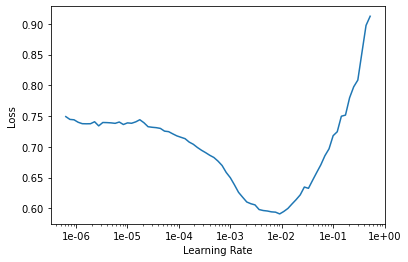

In [78]:
learn.model_dir='/home/tris/Github/SysID_EEGdynamics/models'
learn.lr_find()


learn.recorder.plot()

In [79]:
learn.fit_one_cycle(25, 0.8e-3, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.723170,0.690231,0.528000,00:00
1,0.641886,0.744188,0.504000,00:00
2,0.559070,0.722524,0.516000,00:00
3,0.465504,0.718049,0.564000,00:00
4,0.376805,0.755753,0.592000,00:00
5,0.302886,1.002238,0.612000,00:00
6,0.245462,1.054658,0.644000,00:00
7,0.195669,1.341135,0.616000,00:00
8,0.158391,1.680250,0.640000,00:00
9,0.135237,1.575372,0.640000,00:00


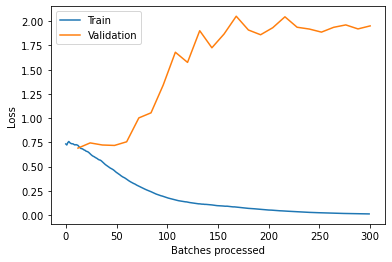

In [80]:
learn.recorder.plot_losses()

In [81]:
learn.show_results()

Phi186,Phi296,Phi127,Phi206,Phi6,Phi109,Phi60,Phi112,Phi104,Phi26,Phi153,Phi147,Phi49,Phi64,Phi85,Phi158,Phi13,Phi99,Phi215,Phi285,Phi256,Phi45,Phi154,Phi220,Phi219,Phi233,Phi196,Phi48,Phi148,Phi253,Phi10,Phi302,Phi119,Phi244,Phi237,Phi33,Phi61,Phi235,Phi55,Phi20,Phi175,Phi157,Phi7,Phi188,Phi198,Phi140,Phi190,Phi24,Phi63,Phi212,Phi214,Phi311,Phi110,sex,Phi4,Phi128,Phi44,Phi46,Phi115,Phi165,Phi123,Phi92,Phi286,Phi183,Phi306,Phi271,Phi168,Phi227,Phi275,Phi263,Phi79,Phi144,Phi51,Phi284,Phi265,Phi171,Phi94,Phi164,Phi62,Phi1,Phi281,Phi267,Phi257,Phi5,Phi81,Phi273,Phi195,Phi221,Phi31,Phi22,Phi197,Phi250,Phi130,Phi143,Phi65,Phi71,Phi230,Phi295,Phi11,Phi229,Phi162,Phi133,Phi247,Phi213,Phi96,Phi280,Phi134,Phi23,Phi223,Phi312,Phi200,Phi73,Phi269,Phi232,Phi122,Phi54,Phi149,Phi58,Phi136,Phi193,Phi146,Phi50,Phi21,Phi15,Phi125,Phi111,Phi282,Phi3,Phi35,Phi30,Phi57,Phi17,Phi224,Phi139,Phi91,Phi100,Phi161,Phi231,Phi156,Phi145,ecg_id,Phi290,Phi249,Phi291,Phi293,Phi205,Phi9,Phi78,Phi129,Phi89,Phi150,Phi210,Phi178,Phi242,Phi137,Phi191,Phi74,Phi38,Phi194,Phi199,Phi288,Phi170,Phi254,Phi304,Phi106,Phi43,Phi67,Phi102,Phi117,Phi177,Phi202,Phi298,Phi131,Phi308,Phi211,Phi184,Phi228,Phi87,Phi95,Phi292,Phi181,Phi160,Phi277,Phi289,Phi203,Phi132,Phi305,Phi258,Phi255,Phi19,Phi310,Phi16,Phi124,Phi294,Phi225,Phi151,Phi176,Phi118,Phi246,Phi40,Phi101,Phi90,Phi69,Phi103,Phi32,Phi208,Phi152,Phi68,Phi121,Phi135,Phi141,Phi260,Phi113,Phi27,Phi226,Phi201,Phi72,Phi52,Phi120,Phi299,Phi279,Phi180,Phi93,Phi204,Phi107,Phi83,Phi169,Phi77,Phi88,Phi264,Phi239,Phi218,Phi12,Phi216,Phi309,Phi37,Phi283,Phi59,Phi155,Phi300,Phi42,Phi142,Phi179,Phi126,Phi98,Phi252,Phi41,Phi301,Phi261,Phi217,Phi207,Phi259,Phi209,Phi138,Phi307,Phi56,Phi70,Phi238,Phi248,Phi159,Phi182,Phi75,Phi66,Phi303,Phi36,Phi2,Phi47,Phi29,Phi14,Phi189,Phi18,Phi243,Phi76,Phi266,Phi167,Phi185,Phi222,Phi105,Phi82,Phi172,Phi272,Phi116,Phi274,Phi187,Phi173,Phi234,Phi268,Phi80,Phi240,Phi34,Phi287,Phi25,Phi297,Phi278,Phi174,Phi114,Phi236,Phi192,Phi270,Phi251,Phi241,Phi108,Phi86,Phi84,Phi53,Phi28,Phi39,patient_id,Phi166,Phi8,Phi276,Phi245,Phi163,Phi262,Phi97,target,prediction
-0.0590,0.0046,-0.0304,-0.0005,-0.1441,0.0052,-0.0070,0.0092,0.0651,0.0016,0.0000,0.0000,-0.0046,-0.0149,-0.0015,0.0004,-0.0116,-0.0241,-0.0927,0.0000,-0.0081,0.0776,0.0000,0.0000,0.0000,0.0729,-0.0518,-0.0908,0.0000,0.0144,0.0306,0.5248,0.0100,-0.0141,-0.1969,0.0118,-0.0058,-0.1241,0.0876,0.0178,-0.2956,0.0068,0.0265,0.0266,-0.0612,0.0000,-0.0273,-0.0059,0.0414,0.1650,-0.0428,11.5788,-0.0236,1.0000,0.0368,-0.0344,0.1328,-0.0571,0.0464,0.0128,0.0227,0.0800,0.0000,-0.0675,4.9440,0.0099,0.1073,0.0000,-0.0044,0.0198,0.0024,0.0000,-0.0321,0.0000,-0.0054,-0.1542,-0.0538,0.0266,0.0356,0.0473,0.0000,0.0012,0.0134,0.1078,0.1063,0.1011,-0.1162,0.0000,0.0710,-0.0095,0.1130,-0.0142,0.0211,0.0000,-0.0236,-0.0048,-0.0238,1.0000,-0.0279,0.0610,-0.0030,0.0000,-0.0511,0.1500,0.0017,0.0000,0.0000,-0.0333,0.0000,0.0000,-0.3158,0.0057,-0.0033,-0.0186,0.0184,-0.0344,0.0000,-0.0586,0.0000,0.1099,0.0000,-0.0368,-0.0102,0.0116,-0.0135,-0.0288,0.0000,-0.1679,-0.0029,0.0092,-0.0056,-0.0116,0.0000,0.0000,0.0989,0.0092,0.0066,-0.0847,0.0000,0.0000,712.0000,0.1749,-0.1552,0.0121,0.0083,-0.0626,0.3339,-0.0215,-0.0175,0.0165,0.0000,0.0308,0.0668,-0.0000,0.0000,-0.0146,-0.0186,0.0293,-0.0063,-0.2505,0.0000,-0.0351,0.0019,2.2305,-0.0172,0.1205,-0.0625,-0.0227,0.0248,-0.2975,0.0750,0.0029,-0.0053,6.6051,0.1275,0.0169,0.0000,-0.0345,-0.0083,0.2318,0.0169,-0.0036,0.0000,1.0000,0.1686,-0.0076,3.3017,-0.0053,-0.0125,0.0524,9.9058,0.0058,-0.0071,0.0047,0.0000,0.0000,-0.3665,-0.0126,-0.0142,0.0223,0.0135,-0.0352,-0.0079,0.0579,0.0656,0.0315,0.0000,-0.0673,-0.0043,0.0000,0.0000,-0.0724,0.0171,0.0168,0.0000,-0.2621,-0.0123,0.0207,0.0142,0.0060,0.0000,0.1846,-0.0163,0.1758,0.0113,0.0186,0.1191,0.0150,0.0188,0.0243,0.0756,0.0000,-0.0348,-0.0999,8.2558,-0.0740,0.0000,-0.0233,0.0000,0.0000,0.0663,0.0000,0.1634,0.0205,-0.0213,0.0449,-0.0886,0.0648,-0.1352,0.0000,0.0621,-0.0308,-0.0623,0.0000,6.418

In [82]:
preds,y,losses=learn.get_preds(with_loss=True)

In [83]:
interp=ClassificationInterpretation.from_learner(learn)

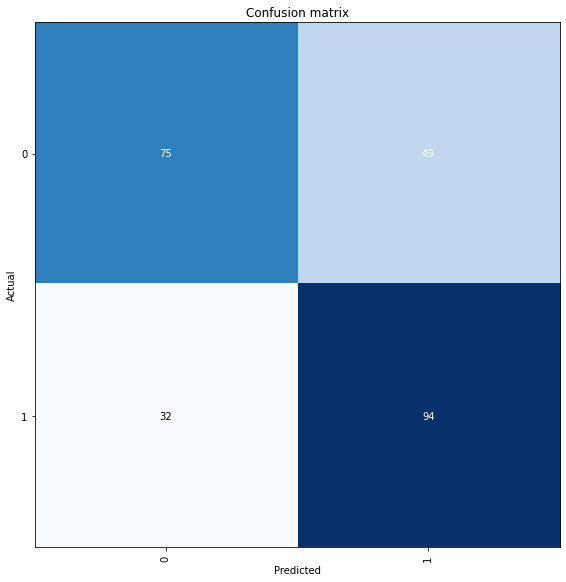

In [84]:
interp.plot_confusion_matrix(figsize=(8,8))